In [120]:
import pandas as pd
from nltk.tokenize import wordpunct_tokenize
import nltk 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer 
import gensim
import tensorflow_hub as hub
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elect\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elect\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elect\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [121]:
data = pd.read_csv("../data/data_clean.csv")
data = data[["Id", "Title", "Body", "Tags"]]
data.reset_index(inplace=True)
data.drop(columns='Id', inplace=True)
data.drop(columns='index', inplace=True)
data.head()

,Title,Body,Tags
0,Unable to continue with rebase due to untracke...,I'm currently mergin two branches using git re...,git
1,Progressive Web App on iOS 12.2 stuck in offli...,I installed a custom progressive web app via s...,ios progressive-web-apps
2,__PRETTY_FUNCTION__ in constant expression,Please refer to this snippet:\n\n#include type...,c++ c++17 constant-expression
3,How to fix 'http: named cookie not present' in...,I'm building a small dinner/plan management ap...,http go cookies jwt postman
4,How can I read a file which will be upload fro...,I create a method in my .Net Core API which wi...,c# file upload asp.net-core-webapi


In [122]:
data['Post'] = data.apply(lambda x: (x['Title'] + ' ' + x['Body'] if x['Title'] == x['Title'] else x['Body']).lower(), axis=1)

In [123]:
data['Tokens'] = data.apply(lambda x: wordpunct_tokenize(x['Post']), axis=1)

In [124]:
most_used_programming_language = [
    "javascript",
    "js",
    "python",
    "py",
    "go",
    "golang",
    "java",
    "kotlin",
    "php",
    "csharp"
    "c#",
    "swift",
    "net",
    "core", 
    "rb",
    "ruby",
    "c",
    "c++",
    "cpp",
    "matlab",
    "typescript",
    "ts",
    "scala",
    "html",
    "css",
    "rust",
    "rs",
    "perl"
]

data.head()

,Title,Body,Tags,Post,Tokens
0,Unable to continue with rebase due to untracke...,I'm currently mergin two branches using git re...,git,unable to continue with rebase due to untracke...,"[unable, to, continue, with, rebase, due, to, ..."
1,Progressive Web App on iOS 12.2 stuck in offli...,I installed a custom progressive web app via s...,ios progressive-web-apps,progressive web app on ios 12.2 stuck in offli...,"[progressive, web, app, on, ios, 12, ., 2, stu..."
2,__PRETTY_FUNCTION__ in constant expression,Please refer to this snippet:\n\n#include type...,c++ c++17 constant-expression,__pretty_function__ in constant expression ple...,"[__pretty_function__, in, constant, expression..."
3,How to fix 'http: named cookie not present' in...,I'm building a small dinner/plan management ap...,http go cookies jwt postman,how to fix 'http: named cookie not present' in...,"[how, to, fix, ', http, :, named, cookie, not,..."
4,How can I read a file which will be upload fro...,I create a method in my .Net Core API which wi...,c# file upload asp.net-core-webapi,how can i read a file which will be upload fro...,"[how, can, i, read, a, file, which, will, be, ..."


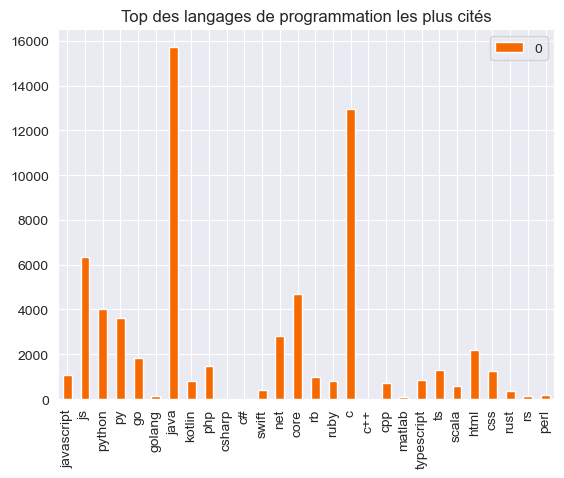

In [125]:
def token_plot(tokens):
    token_count = {
        "javascript": 0,
        "js": 0,
        "python": 0,
        "py": 0,
        "go": 0,
        "golang": 0,
        "java": 0,
        "kotlin": 0,
        "php": 0,
        "csharp": 0,
        "c#": 0,
        "swift": 0,
        "net": 0,
        "core": 0,
        "rb": 0,
        "ruby": 0,
        "c": 0,
        "c++": 0,
        "cpp": 0,
        "matlab": 0,
        "typescript": 0,
        "ts": 0,
        "scala": 0,
        "html": 0,
        "css": 0,
        "rust": 0,
        "rs": 0,
        "perl": 0
    }

    for token_series in tokens:
        for token in token_series:
            if token in most_used_programming_language:
                token_count[token] += 1

    df = pd.DataFrame.from_dict(token_count, orient='index')
    df.plot(kind='bar', color="#f56900", title='Top des langages de programmation les plus cités')

token_plot(data['Tokens'])

# StopWords

In [126]:
stop_words = set(stopwords.words('english'))

def delete_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]   
     
data['Tokens'] = data.apply(lambda x: delete_stopwords(x['Tokens']), axis=1)

data.head()

,Title,Body,Tags,Post,Tokens
0,Unable to continue with rebase due to untracke...,I'm currently mergin two branches using git re...,git,unable to continue with rebase due to untracke...,"[unable, continue, rebase, due, untracked, wor..."
1,Progressive Web App on iOS 12.2 stuck in offli...,I installed a custom progressive web app via s...,ios progressive-web-apps,progressive web app on ios 12.2 stuck in offli...,"[progressive, web, app, ios, 12, ., 2, stuck, ..."
2,__PRETTY_FUNCTION__ in constant expression,Please refer to this snippet:\n\n#include type...,c++ c++17 constant-expression,__pretty_function__ in constant expression ple...,"[__pretty_function__, constant, expression, pl..."
3,How to fix 'http: named cookie not present' in...,I'm building a small dinner/plan management ap...,http go cookies jwt postman,how to fix 'http: named cookie not present' in...,"[fix, ', http, :, named, cookie, present, ', g..."
4,How can I read a file which will be upload fro...,I create a method in my .Net Core API which wi...,c# file upload asp.net-core-webapi,how can i read a file which will be upload fro...,"[read, file, upload, form, ., net, core, api, ..."


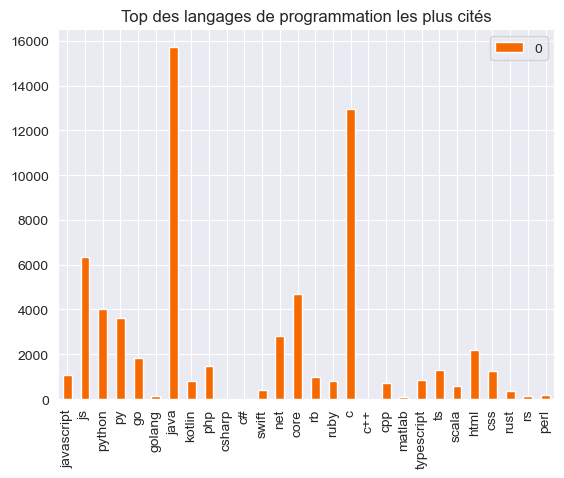

In [127]:
token_plot(data['Tokens'])

# Lemmatize

In [128]:
def lemmatize(token_series):
    lemmatizer = WordNetLemmatizer()
    tokens = []
    for token in token_series:
        tokens.append(lemmatizer.lemmatize(token))
    return tokens

data['TokensLem'] = data.apply(lambda x: lemmatize(x['Tokens']), axis=1)

In [129]:
data.head()

,Title,Body,Tags,Post,Tokens,TokensLem
0,Unable to continue with rebase due to untracke...,I'm currently mergin two branches using git re...,git,unable to continue with rebase due to untracke...,"[unable, continue, rebase, due, untracked, wor...","[unable, continue, rebase, due, untracked, wor..."
1,Progressive Web App on iOS 12.2 stuck in offli...,I installed a custom progressive web app via s...,ios progressive-web-apps,progressive web app on ios 12.2 stuck in offli...,"[progressive, web, app, ios, 12, ., 2, stuck, ...","[progressive, web, app, io, 12, ., 2, stuck, o..."
2,__PRETTY_FUNCTION__ in constant expression,Please refer to this snippet:\n\n#include type...,c++ c++17 constant-expression,__pretty_function__ in constant expression ple...,"[__pretty_function__, constant, expression, pl...","[__pretty_function__, constant, expression, pl..."
3,How to fix 'http: named cookie not present' in...,I'm building a small dinner/plan management ap...,http go cookies jwt postman,how to fix 'http: named cookie not present' in...,"[fix, ', http, :, named, cookie, present, ', g...","[fix, ', http, :, named, cookie, present, ', g..."
4,How can I read a file which will be upload fro...,I create a method in my .Net Core API which wi...,c# file upload asp.net-core-webapi,how can i read a file which will be upload fro...,"[read, file, upload, form, ., net, core, api, ...","[read, file, upload, form, ., net, core, api, ..."


# Bag Of Word

In [130]:
def bag_of_word(x):
    cv = CountVectorizer(stop_words='english')
    bog = cv.fit_transform(x['Tokens'])
    return bog

def bag_of_word_lem(x):
    cv = CountVectorizer(stop_words='english')
    bog_lem = cv.fit_transform(x['TokensLem'])
    return bog_lem


data['BOG'] = data.apply(lambda x: bag_of_word(x), axis=1)
data['BogLem'] = data.apply(lambda x: bag_of_word_lem(x), axis=1)

# TF-IDT

In [131]:
tfidf = TfidfVectorizer()  

data['Tfidt'] = data.apply(lambda x: tfidf.fit_transform(x['TokensLem']), axis=1)

print(tfidf.get_feature_names())
data['Tokens'].head()

['anyone', 'asked', 'aware', 'browsing', 'code', 'definition', 'devs', 'edit', 'exists', 'extension', 'feeling', 'file', 'force', 'front', 'function', 'get', 'going', 'hacky', 'hidden', 'however', 'instead', 'jump', 'jumping', 'know', 'like', 'looking', 'love', 'officially', 'optionally', 'otherwise', 'pain', 'raw', 'sits', 'sometimes', 'sort', 'source', 'supported', 'sure', 'team', 'thanks', 'thousand', 'typescript', 'vscode', 'work', 'workaround']


C:\Users\elect\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0    [unable, continue, rebase, due, untracked, wor...
1    [progressive, web, app, ios, 12, ., 2, stuck, ...
2    [__pretty_function__, constant, expression, pl...
3    [fix, ', http, :, named, cookie, present, ', g...
4    [read, file, upload, form, ., net, core, api, ...
Name: Tokens, dtype: object

# World2Vec

In [132]:
#w2v_size=300
#w2v_window=5
#w2v_min_count=1
#w2v_epochs=100
#maxlen = len(data['Post']) # adapt to length of sentences
sentences = data['Post'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [133]:
#from tensorflow.python.distribute.multi_process_runner import multiprocessing
#print("Build & train Word2Vec model ...")
#w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window, vector_size=w2v_size, seed=42, workers=1)
#workers = multiprocessing.cpu_count()
#w2v_model.build_vocab(sentences)
#w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
#model_vectors = w2v_model.wv
#w2v_words = model_vectors.index_to_key
#print("Vocabulary size: %i" % len(w2v_words))
#print("Word2Vec trained")

In [134]:
#sim_words = w2v_model.wv.most_similar('cpp')

#print(sim_words)

In [135]:
#sim_words = w2v_model.wv.most_similar(positive=["gcc", "cpp"], negative="js")
#print(sim_words)

# Use

In [136]:
# get cosine similairty matrix
#def cos_sim(input_vectors):
#    similarity = cosine_similarity(input_vectors)
#    return similarity

# get topN similar sentences
#def get_top_similar(index, sentence_list, similarity_matrix, topN):
    # get the corresponding row in similarity matrix
#   similarity_row = np.array(similarity_matrix[index, :])
    # get the indices of top similar
#    indices = similarity_row.argsort()[-topN:][::-1]
#    return [sentence_list[i] for i in indices]

#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

#sentences_embeddings = embed(data['Post'])

#similarity_matrix = cos_sim(np.array(sentences_embeddings))

#top_similar = get_top_similar(0, data['Post'], similarity_matrix, 3)

#for x in range(len(top_similar)):
#    print("----")
#    print(top_similar[x])

# Bert

In [137]:
#BERT_MODEL = "https://tfhub.dev/google/experts/bert/wiki_books/2"
#PREPROCESS_MODEL = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
#import tensorflow_text
#preprocess = hub.load(PREPROCESS_MODEL)
#bert = hub.load(BERT_MODEL)
#bert_inputs = preprocess(data['Post'].head(150))

#bert_outputs = bert(bert_inputs, training=False)
#pooled_output = bert_outputs['pooled_output']
#sequence_output = bert_outputs['sequence_output']

#print('\nSentences:')
#print(data['Post'][0])
#print('\nPooled output:')
#print(pooled_output[0])
#print('\nSequence output:')
#print(sequence_output[0])



In [138]:
def tags_to_array(x):
    tags = []
    for tag in x['Tags'].split(" "):
        if tag != " " or tag != " ":
            tags.append(tag)
    return tags

data['Tags'] = data.apply(lambda x: tags_to_array(x), axis=1)
data.dropna(inplace=True, axis=1)
data.head()

,Title,Body,Tags,Post,Tokens,TokensLem,BOG,BogLem,Tfidt
0,Unable to continue with rebase due to untracke...,I'm currently mergin two branches using git re...,"[git, ]",unable to continue with rebase due to untracke...,"[unable, continue, rebase, due, untracked, wor...","[unable, continue, rebase, due, untracked, wor...","(0, 45)\t1\n (1, 11)\t1\n (2, 35)\t1\n (4...","(0, 43)\t1\n (1, 10)\t1\n (2, 34)\t1\n (4...","(0, 56)\t1.0\n (1, 11)\t1.0\n (2, 44)\t1.0..."
1,Progressive Web App on iOS 12.2 stuck in offli...,I installed a custom progressive web app via s...,"[ios, progressive-web-apps, ]",progressive web app on ios 12.2 stuck in offli...,"[progressive, web, app, ios, 12, ., 2, stuck, ...","[progressive, web, app, io, 12, ., 2, stuck, o...","(0, 34)\t1\n (1, 48)\t1\n (2, 4)\t1\n (3,...","(0, 34)\t1\n (1, 47)\t1\n (2, 4)\t1\n (3,...","(0, 38)\t1.0\n (1, 55)\t1.0\n (2, 5)\t1.0\..."
2,__PRETTY_FUNCTION__ in constant expression,Please refer to this snippet:\n\n#include type...,"[c++, c++17, constant-expression, ]",__pretty_function__ in constant expression ple...,"[__pretty_function__, constant, expression, pl...","[__pretty_function__, constant, expression, pl...","(0, 0)\t1\n (1, 8)\t1\n (2, 13)\t1\n (4, ...","(0, 0)\t1\n (1, 8)\t1\n (2, 12)\t1\n (4, ...","(0, 0)\t1.0\n (1, 9)\t1.0\n (2, 14)\t1.0\n..."
3,How to fix 'http: named cookie not present' in...,I'm building a small dinner/plan management ap...,"[http, go, cookies, jwt, postman, ]",how to fix 'http: named cookie not present' in...,"[fix, ', http, :, named, cookie, present, ', g...","[fix, ', http, :, named, cookie, present, ', g...","(0, 130)\t1\n (2, 152)\t1\n (4, 178)\t1\n ...","(0, 129)\t1\n (2, 149)\t1\n (4, 174)\t1\n ...","(0, 135)\t1.0\n (2, 159)\t1.0\n (4, 188)\t..."
4,How can I read a file which will be upload fro...,I create a method in my .Net Core API which wi...,"[c#, file, upload, asp.net-core-webapi, ]",how can i read a file which will be upload fro...,"[read, file, upload, form, ., net, core, api, ...","[read, file, upload, form, ., net, core, api, ...","(0, 38)\t1\n (1, 17)\t1\n (2, 54)\t1\n (3...","(0, 38)\t1\n (1, 17)\t1\n (2, 54)\t1\n (3...","(0, 41)\t1.0\n (1, 17)\t1.0\n (2, 58)\t1.0..."


# LDA

In [139]:
from sklearn.decomposition import TruncatedSVD

def make_pca(x):
    pca = TruncatedSVD(n_components=2)
    X_reduced_train = pca.fit_transform(x['Tfidt'])
    return X_reduced_train

data['Tfidt_PCA'] = data.apply(lambda x: make_pca(x), axis=1)

In [ ]:
from matplotlib import pyplot as plt
from gensim.models import TfidfModel
from gensim import corpora, models
from gensim.models import CoherenceModel

def make_lda(posts, num_topic):
    dictionary = corpora.Dictionary(posts)
    dictionary.filter_extremes(no_below=1000)
    bow_corpus = [dictionary.doc2bow(text) for text in posts]
    tfidf = TfidfModel(bow_corpus)
    tfidf_corpus = [tfidf[text] for text in bow_corpus]

    ldamodel = gensim.models.ldamulticore.LdaMulticore(tfidf_corpus, num_topics=num_topic, id2word = dictionary, passes=20)
    coherencemodel = CoherenceModel(model=ldamodel, texts=posts, dictionary=dictionary, coherence='c_v')
    return coherencemodel.get_coherence()


score_lda = []
for i in range(1, 16):
    score_lda.append(make_lda(sentences, i))

print(score_lda)

In [ ]:
limit=17; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, score_lda)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
import pyLDAvis.gensim_models

dictionary = corpora.Dictionary(sentences)
dictionary.filter_extremes(no_below=1000)
bow_corpus = [dictionary.doc2bow(text) for text in sentences]
tfidf = TfidfModel(bow_corpus)
tfidf_corpus = [tfidf[text] for text in bow_corpus]

ldamodel = gensim.models.ldamulticore.LdaMulticore(tfidf_corpus, num_topics=7, id2word = dictionary, passes=20)
lda_visualization = pyLDAvis.gensim_models.prepare(ldamodel, tfidf_corpus, dictionary, sort_topics=False)

topics = ldamodel.get_document_topics(bow_corpus)
pyLDAvis.display(lda_visualization)
